In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:, 2:]

In [7]:
df.shape

(400, 3)

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
281,35,61000,0
180,26,16000,0
312,38,50000,0
364,42,104000,1
34,27,90000,0


### Train Test Split

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=42)

In [117]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [118]:
X_train

,Age,EstimatedSalary
157,29,75000
109,38,80000
17,45,26000
347,54,108000
24,46,23000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [119]:
X_test

,Age,EstimatedSalary
209,46,22000
280,59,88000
33,28,44000
210,48,96000
93,29,28000
...,...,...
60,27,20000
79,26,17000
285,37,93000
305,42,54000


### Standard Scaler

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

In [122]:
X_train_scaled

array([[-0.84252154,  0.1301563 ],
       [ 0.04175763,  0.2777019 ],
       [ 0.72953032, -1.31579061],
       [ 1.61380949,  1.10395728],
       [ 0.82778356, -1.40431797],
       [-1.43204099, -1.25677236],
       [-0.05649561,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 ,  0.01211982],
       [ 1.31904976,  2.22530386],
       [ 0.14001087,  0.74984783],
       [-1.33378775,  0.54328399],
       [ 2.00682245,  0.72033871],
       [-1.23553451, -1.43382709],
       [ 0.33651735, -0.34198963],
       [-0.94077478,  0.54328399],
       [ 0.43477059,  0.2777019 ],
       [ 0.43477059,  1.10395728],
       [ 0.82778356,  0.74984783],
       [ 0.9260368 ,  1.25150288],
       [-0.44950858, -1.25677236],
       [-1.82505395, -1.34529973],
       [ 1.12254328,  0.54328399],
       [-0.64601506, -1.64039093],
       [-0.7442683 ,  0.24819278],
       [ 1.02429004,  2.07775825],
       [-0.54776182,  1.36953936],
       [-0.05649561,  0.01211982],
       [-1.9233072 ,

In [123]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [124]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [126]:
np.round(X_train_scaled_df.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


- After standardization mean becomes 0 and standard deviation becomes 1

### Effect of Scaling

Text(0.5, 1.0, 'After Scaling')

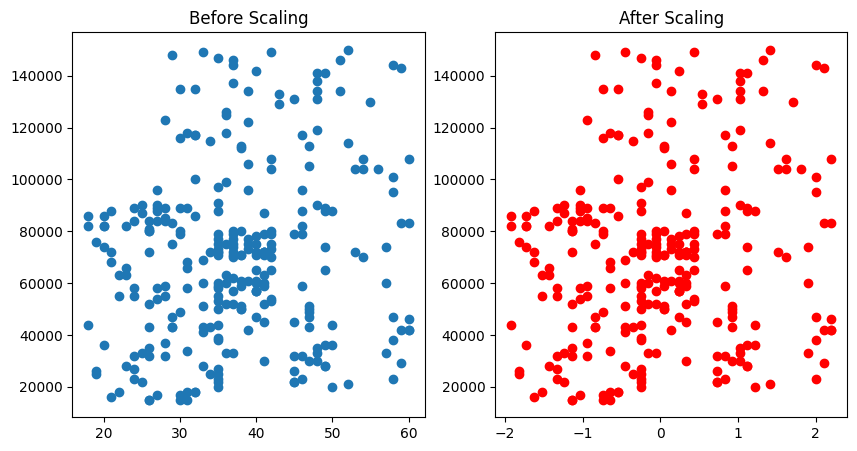

In [128]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled_df['Age'], X_train['EstimatedSalary'], c='r')
ax2.set_title('After Scaling')

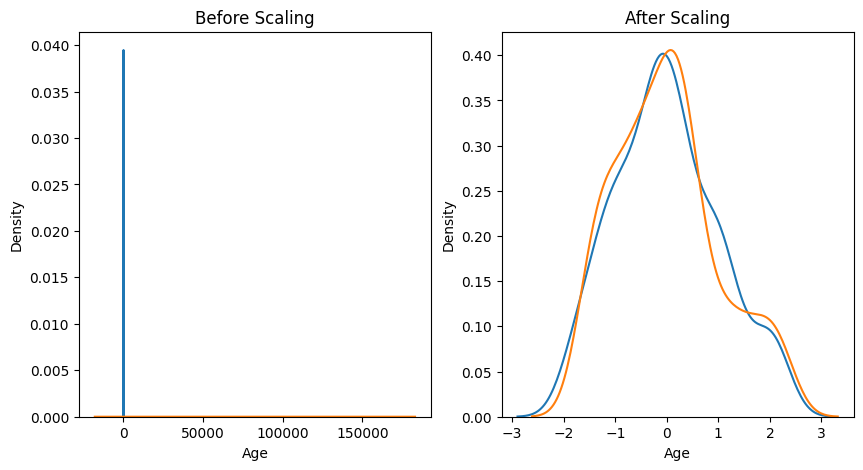

In [129]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled_df['Age'])
sns.kdeplot(X_train_scaled_df['EstimatedSalary'])

plt.show()

### Comparision of Distributions

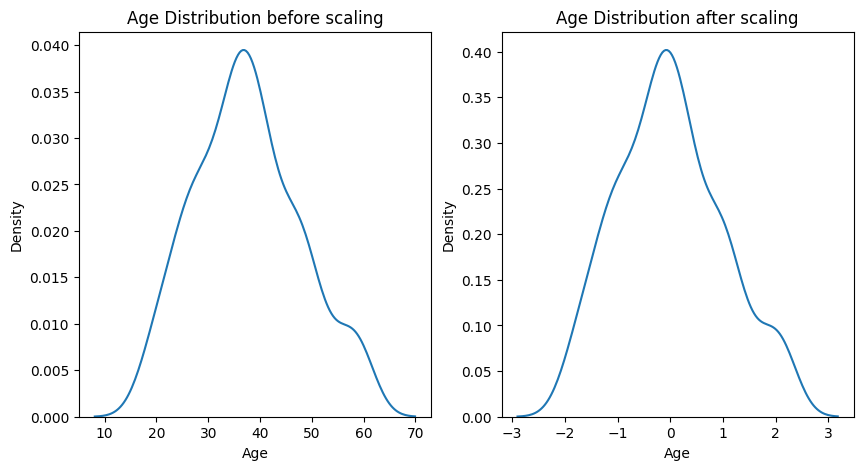

In [130]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

#before scaling
ax1.set_title('Age Distribution before scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

#after scaling
ax2.set_title('Age Distribution after scaling')
sns.kdeplot(X_train_scaled_df['Age'], ax=ax2)
plt.show()

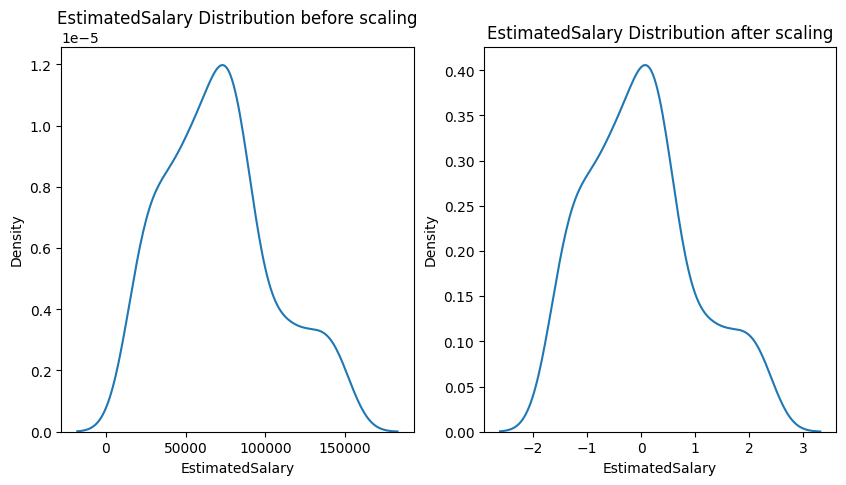

In [131]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

#before scaling
ax1.set_title('EstimatedSalary Distribution before scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#after scaling
ax2.set_title('EstimatedSalary Distribution after scaling')
sns.kdeplot(X_train_scaled_df['EstimatedSalary'], ax=ax2)
plt.show()

### Why is scaling so important?

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [134]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [135]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [136]:
from sklearn.metrics import accuracy_score

In [137]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.85
Scaled 0.85


In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [140]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [142]:
y_dt_pred =dt.predict(X_test)
y_dt_scaled_pred = dt_scaled.predict(X_test_scaled)

In [143]:
print("Actual", accuracy_score(y_test, y_dt_pred))
print("Scaled", accuracy_score(y_test, y_dt_scaled_pred))

Actual 0.8666666666666667
Scaled 0.8333333333333334


### Effect of outlier

In [144]:
df = pd.concat([df, pd.DataFrame(data = {'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [1, 0, 0]})])

In [145]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
0,5,1000,1
1,90,250000,0


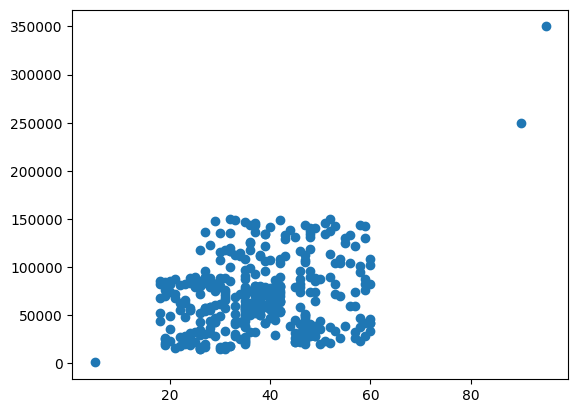

In [146]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [152]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

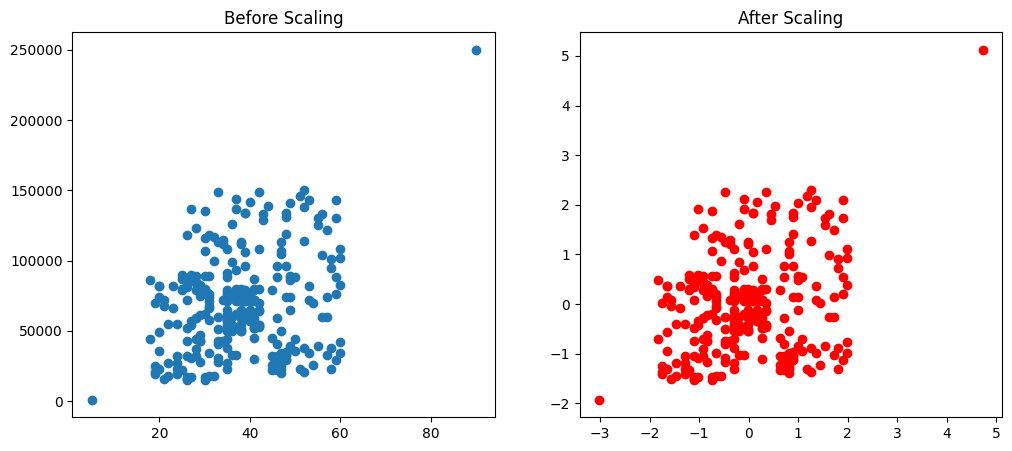

In [153]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()